## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Part IV - Conclusion](#conclusion)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df[df['converted']==1]['user_id'].nunique()/df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
treat_not_equal_new = df.query('group=="treatment" and landing_page=="old_page"')
control_not_equal_old = df.query('group=="control" and landing_page=="new_page"')

print("Treatment does not equal new page count - ", treat_not_equal_new.shape[0])
print("Control does not equal old page count - ", control_not_equal_old.shape[0])
print("Total counts not matching - ", treat_not_equal_new.shape[0] + control_not_equal_old.shape[0])

Treatment does not equal new page count -  1965
Control does not equal old page count -  1928
Total counts not matching -  3893


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.drop(treat_not_equal_new.index.union(control_not_equal_old.index))

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
mask = df2['user_id'].value_counts() > 1
mask[mask == True]

773192    True
Name: user_id, dtype: bool

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df['user_id'].isin(mask.index[mask==True])]

<ipython-input-12-e5a1fbe37631>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df['user_id'].isin(mask.index[mask==True])]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset=['user_id'], inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
p = df2.query('converted==1').shape[0]/df2.shape[0]

p

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
p_control = df2.query('converted==1 & group=="control"').shape[0]/df2.query('group=="control"').shape[0]
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
p_treatment = df2.query('converted==1 & group=="treatment"').shape[0]/df2.query('group=="treatment"').shape[0]
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
p_new_page = df2.query('landing_page=="new_page"').shape[0]/df2.shape[0]
p_new_page

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Based on the observed probablity it would appear that there is not evidence that the new treatment page would lead to increased conversions. The population of the expirement is roughly split 50/50 however the control group has a higher observed probablity than the treatment group on converting.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null**: $p_{new} - p_{old} \le 0$

**Alternative**: $p_{new} - p_{old} > 0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [18]:
n_old = df2.query('landing_page=="old_page"').shape[0]
n_new = df2.query('landing_page=="new_page"').shape[0]
p_converted = df2.query('converted==1').shape[0]/df2.shape[0]

#here we run a binomial simulation for both old and new for the number of each. Uses the overall conversion rate for p.
#Then we will calculate the mean for each case.
control_p = np.random.binomial(n_old, p_converted, 10000)/n_old
treatment_p = np.random.binomial(n_new, p_converted, 10000)/n_new



a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
np.mean(treatment_p)

0.11960639047553505

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
np.mean(control_p)

0.11960278232856533

c. What is $n_{new}$?

In [21]:
n_new

145310

d. What is $n_{old}$?

In [22]:
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.binomial(1, np.mean(treatment_p), n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.binomial(1, np.mean(control_p), n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
diff_p = np.mean(new_page_converted) - np.mean(old_page_converted)
print("{:.10f}".format(diff_p))

-0.0011446337


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = []
#we will simulate this again using the binomial function similar to the start of part 2.
control_sample = np.random.binomial(n_old, p_converted, 10000)/n_old
treatment_sample = np.random.binomial(n_new, p_converted, 10000)/n_new
p_diffs = treatment_sample - control_sample
    
print("{:.10f}".format(np.mean(p_diffs)))

0.0000050829


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

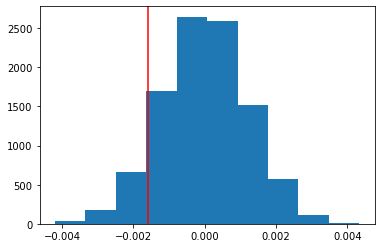

In [27]:
plt.hist(p_diffs);
#will additionally add a line which represents the difference for our observed proportion in the dataset.
plt.axvline(p_treatment - p_control, color = 'red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
obs_diff = p_treatment - p_control
#will calculate an array which will be 1 for all of our simulated values greater than our observed proportion
#the mean of this will then be our p-value, ie proportion greater than the observed difference
(np.array(p_diffs) > obs_diff).mean()

0.9068

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

***In j we computed the proportion of our simulated data which was larger than our sample mean. This would be defined as the p-value and is the probablity of observing our statistic given our null hypothesis is true. As the p-value is this would lead us to not reject our null hypothesis that the new page has a larger proportion of conversions than our old page.***

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted==1')['converted'].sum()
convert_new = df2.query('landing_page == "new_page" & converted==1')['converted'].sum()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
from statsmodels.stats.proportion import proportions_ztest

#we will use the alternative=larger value as that is what our alternative hypothesis is for this analysis
proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Given a z-score of -1.31 and using an alpha of .05 would equate to roughly .9115 when referring to the Z table. Additionally the p-value is also large, and tracks very closely with our earlier predicted p-value, in both cases these track with our earlier conclusion to not reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**As the column we would be trying to predict is categorical, converted or not converted, we would us logistic regression for our model.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df2['intercept'] = 1
#we are generating a dummy dataframe with columns treatment and control but then only adding the treatment column to 
#our existing dataframe as name ab_page
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
from statsmodels.discrete.discrete_model import Logit

model = Logit(df2['converted'], df2[['intercept', 'ab_page']])

results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-12-26 12:35 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

***The p-value associated with ab_page is .1899 for our regression model. This p-value differs from our earlier p-values because the null hypothesis differs from our earlier calculations in a regression model. The earlier calculations were looking at a null hypothesis which was $p_{new} - p_{old} \leq 0$ however logistic regression uses the null hypothesis that $\beta_{1} = 0$ so in our regression model the p-value is in reference to the ab_page parameter having a relationship to the converted value. Given our high p-value this would not lead us to reject the null hypothesis and so we could not say that there is a non-zero relationship between our ab_page paramter and a user being converted.***

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**From the existing data we could include in our regression data points time of day or day of week based on the timestamp. This might help us see if time influences conversion rates as if you see an effect of larger conversion rates on the weekend vs weekday but your control vs treatment group do not share a similar population this could be influencing your results. Disadvantages to adding additional terms could be that you overfit you regression model to your data and cannot draw generalizations about the populations.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [35]:
#creating the dummies dataframe with column for each country then joining that to our existing dataframe with each column
#representing one of the countries.
country_dums = pd.get_dummies(df_new['country'])
df_new[['CA', 'UK', 'US']] = country_dums

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [36]:
#here we are getting the number of cases for each country. These will be used later in our simulation.
n_uk = df_new.query('country=="UK"').shape[0]
n_us = df_new.query('country=="US"').shape[0]
n_ca = df_new.query('country=="CA"').shape[0]

#here we are getting the observed proportions for converting by each country. We are calculating both the proportion
#of converted users for each country and the converted users not for that country. Again this will be used in our simulations
p_uk = df_new.query('country=="UK" & converted==1').shape[0]/n_uk
p_not_uk = df_new.query('country!="UK" & converted==1').shape[0]/df_new.query('country!="UK"').shape[0]

p_us = df_new.query('country=="US" & converted==1').shape[0]/n_us
p_not_us = df_new.query('country!="US" & converted==1').shape[0]/df_new.query('country!="US"').shape[0]

p_ca = df_new.query('country=="CA" & converted==1').shape[0]/n_ca
p_not_ca = df_new.query('country!="CA" & converted==1').shape[0]/df_new.query('country!="CA"').shape[0]

print('Size of populations by country (UK, US, CA) - ', n_uk, n_us, n_ca)
print('conversion rates by country (UK, US, CA) - ', p_uk, p_us, p_ca)

Size of populations by country (UK, US, CA) -  72466 203619 14499
conversion rates by country (UK, US, CA) -  0.12059448568984076 0.1195468006423762 0.11531829781364232


Similar to what we did for the control/treatment analysis we are going to do the same by country.

In [37]:
#here we are binomialing simulating for each country. This is similar to what we did for part 2h.
# once we have the simulations we will calculate the difference and then find the p-value.
uk_sample = np.random.binomial(n_uk, p_converted, 10000)/n_uk
uk_not_sample = np.random.binomial(n_us + n_ca, p_converted, 10000)/(n_us + n_ca)
p_diffs_uk = uk_sample - uk_not_sample
    
us_sample = np.random.binomial(n_us, p_converted, 10000)/n_us
us_not_sample = np.random.binomial(n_uk + n_ca, p_converted, 10000)/(n_uk + n_ca)
p_diffs_us = us_sample - us_not_sample
    
ca_sample = np.random.binomial(n_ca, p_converted, 10000)/n_ca
ca_not_sample = np.random.binomial(n_uk + n_us, p_converted, 10000)/(n_uk + n_us)
p_diffs_ca = ca_sample - ca_not_sample
    
print("UK - {:.10f}".format(np.mean(p_diffs_uk)))
print("US - {:.10f}".format(np.mean(p_diffs_us)))
print("CA - {:.10f}".format(np.mean(p_diffs_ca)))

UK - -0.0000181441
US - 0.0000124737
CA - 0.0000547727


Lets plot 3 histograms, one for each country, to help visual.

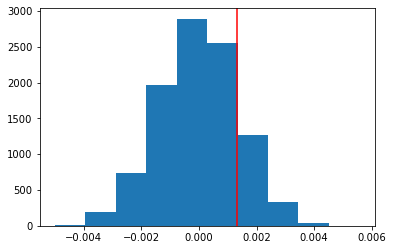

In [45]:
plt.hist(p_diffs_uk);
#will additionally add a line which represents the difference for our observed proportion in the dataset. We will do this for
#each of our country histograms
plt.axvline(p_uk - p_not_uk, color = 'red');

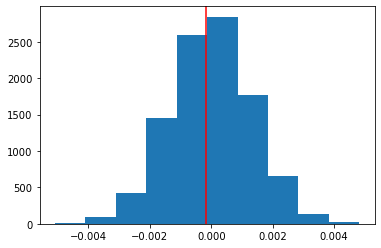

In [47]:
plt.hist(p_diffs_us);
plt.axvline(p_us - p_not_us, color = 'red');

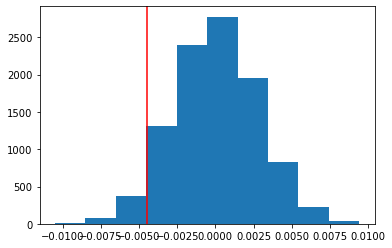

In [48]:
plt.hist(p_diffs_ca);
plt.axvline(p_ca - p_not_ca, color = 'red');

***Lets calculate p-values based on the same null hypthosis as our new page but using country, where country is each country and not country is the other 2 countries.***

**Null**: $p_{country} - p_{not country} \le 0$

**Alternative**: $p_{country} - p_{not country} > 0$


In [41]:
obs_diff_uk = p_uk - p_not_uk
obs_diff_us = p_us - p_not_us
obs_diff_ca = p_ca - p_not_ca

print('p-value for UK - ',(np.array(p_diffs_uk) > obs_diff_uk).mean())
print('p-value for US - ',(np.array(p_diffs_us) > obs_diff_us).mean())
print('p-value for CA - ',(np.array(p_diffs_ca) > obs_diff_ca).mean())

p-value for UK -  0.1659
p-value for US -  0.5521
p-value for CA -  0.9531


***From these p-values, which tie in with what we saw on the histograms, we would not a sufficient data to reject the null hypothesis.***

Lets run a quick logistic regression model to see the results of using country to predict the converted value.

In [42]:
#we will use US as the base line to make our matrix for logistic regression full rank
df_new['intercept'] = 1

model_country = Logit(df_new['converted'], df_new[['intercept', 'UK', 'CA']])

results_country = model_country.fit()

results_country.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2020-12-26 12:35 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
==================================================================

"""

***Our logistic regression model speaks to the same finding which we found in our own analysis due to the high p-values shown in the summary.***

***Given this we would not reject the null hypothesis that the country has an effect on whether the user converted.***

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

***As we will use US as the base line again we will add 2 columns which will be (CA * ab_page) and (UK * ab_page) and then fit the model using the new columns***

In [43]:
df_new['CA_ab_page'] = df_new['CA']*df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CA_ab_page,UK_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


In [44]:
#again we will use US as the base line to make our matrix for logistic regression full rank and include the ab_page in
# fitting our model.
df_new['intercept'] = 1

model_country = Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK_ab_page', 'UK', 'CA_ab_page', 'CA']])

results_country = model_country.fit()

results_country.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2020-12-26 12:35 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK_ab_page    0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA_ab_page   -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
==================================================================

"""

***From our summary results we can see that the p-values are still showing that ab_page*country does not lead us to believe that either are significant in resulting in a converted value.***

<a id='conclusion'></a>
### Conclusion

To conclude we used a variaty of techniques to test for signicant change in converted users between old and new page. We used simulated binomial distributions based on the observed data set to calculate the p-values where the null hypothesis that a difference in proportion of the new to old page was less than or equal to 0 and were unable to reject the null based on the results. Further we used logistic regression and further based on that analysis the p-values and summary results did not lead us to see a significant relationship between the user converted and the old vs new page. Finally we ran the same analysis using each user's country and did not find any evidence that country affects the converted rate.

From this anaylsis we would not reject the null hypothesis in any of the cases we performed. That is, we would not reject the null hypothesis that the old page converts at a rate larger than or equal to the new page, nor would we reject the null hypothesis that any single country converts at a rate larger than or equal to the other two countries.

Given what is known, and assuming costs are the same for both the old and new page, my suggestion would be to continue running the old web page as my results have shown that there are no observable benefits in changing to the new web page.